In [1]:
# Converts the wav files into spectrograms

In [47]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torchaudio

In [50]:
audio_path = '/workspace/small_model_data3/90Deg_EARS_1_0.wav'
y, sr = librosa.load(audio_path, sr=44100)


In [51]:
sr

44100

In [52]:
D = librosa.stft(y)

In [54]:
# Define the sample rate, window length, hop length, and FFT size
sr = 44100  # Sample rate in Hz (change this to match your audio's sample rate)
window_length_ms = 25  # Window length in ms
hop_length_ms = 10  # Hop length in ms

# Convert window length and hop length from ms to samples
window_length_samples = int(sr * window_length_ms / 1000)
hop_length_samples = int(sr * hop_length_ms / 1000)

n_fft = window_length_samples

# Compute the STFT with a Hanning window
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length_samples, win_length=window_length_samples, window='hann')

In [59]:
D

array([[-1.1222749e+00+0.0000000e+00j, -1.4519585e+00+0.0000000e+00j,
        -3.4167171e-01+0.0000000e+00j, ...,
         1.8931266e+00+0.0000000e+00j, -1.3561734e+00+0.0000000e+00j,
        -8.8351232e-01+0.0000000e+00j],
       [ 4.3424711e-01-8.2596195e-01j,  9.3835300e-01+9.0542996e-01j,
         1.6927063e-01-3.4703857e-01j, ...,
        -1.6007990e+00-5.0091225e-01j,  1.2039441e+00-7.4699479e-01j,
         3.0915830e-01+6.6478997e-01j],
       [ 2.5938433e-01+4.4170830e-01j, -2.2790350e-01-6.2095320e-01j,
        -7.2818100e-02+4.9303067e-01j, ...,
         6.6668361e-01+1.2006077e-01j, -5.2372921e-01+1.4580563e-01j,
         2.1674611e-01-3.4480929e-01j],
       ...,
       [ 6.6149706e-04-6.9848302e-06j, -1.9897707e-05-5.8644855e-05j,
         2.2089239e-09+3.1390537e-09j, ...,
        -1.6005210e-08-8.1398586e-09j,  8.9697458e-08-3.0119193e-07j,
        -3.2106229e-06+1.2012141e-07j],
       [-6.6150975e-04+3.4934335e-06j, -5.0332023e-05-3.6073838e-05j,
        -2.5150682e-09

/tmp/ipykernel_1791/20838542.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(D, sr=sr, hop_length=hop_length_samples, y_axis='log', x_axis='time')


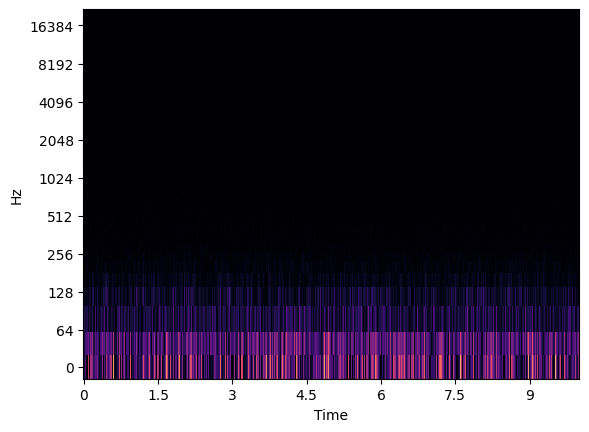

In [58]:
librosa.display.specshow(D, sr=sr, hop_length=hop_length_samples, y_axis='log', x_axis='time')

In [63]:
# Load all files from /workspace/small_model_data3
target_dir = '/workspace/1sec_wav_files'
output_dir = '/workspace/1sec_spectrogram_files'
# Use os to get list of all files in directory
import os

file_list = os.listdir(target_dir)

# Loop through all files
for file in file_list:
    # For each file, load in as wave then convert to spectrogram
    audio_path = os.path.join(target_dir, file)
    y, sr = librosa.load(audio_path, sr=44100)
    # Define the sample rate, window length, hop length, and FFT size
    sr = 44100  # Sample rate in Hz (change this to match your audio's sample rate)
    window_length_ms = 25  # Window length in ms
    hop_length_ms = 10  # Hop length in ms

    # Convert window length and hop length from ms to samples
    window_length_samples = int(sr * window_length_ms / 1000)
    hop_length_samples = int(sr * hop_length_ms / 1000)

    n_fft = window_length_samples

    # Compute the STFT with a Hanning window
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length_samples, win_length=window_length_samples, window='hann')

    # Save the spectrogram in output
    np.save(os.path.join(output_dir, file), D)

    
